## Template para uso de framework (scikit-learn)
En términos generales, debemos seguir los siguientes pasos:
1. Importar módulos
2. Cargar datos
3. Separar datos en subconjuntos
4. Entrenar el modelo
5. Analizar su desempeño
6. Usar el modelo para nuevas estimaciones (datos no vistos)

Los parametros que yo seleccione fueron 20,000 iteraciones con un eta pequeño, de 0.002, para que tenga el espacio y el incremento correctto para ser graficado


Score en entrenamiento: 0.9759576394445424
Error cuadrático medio en prueba: 172.22316640079526


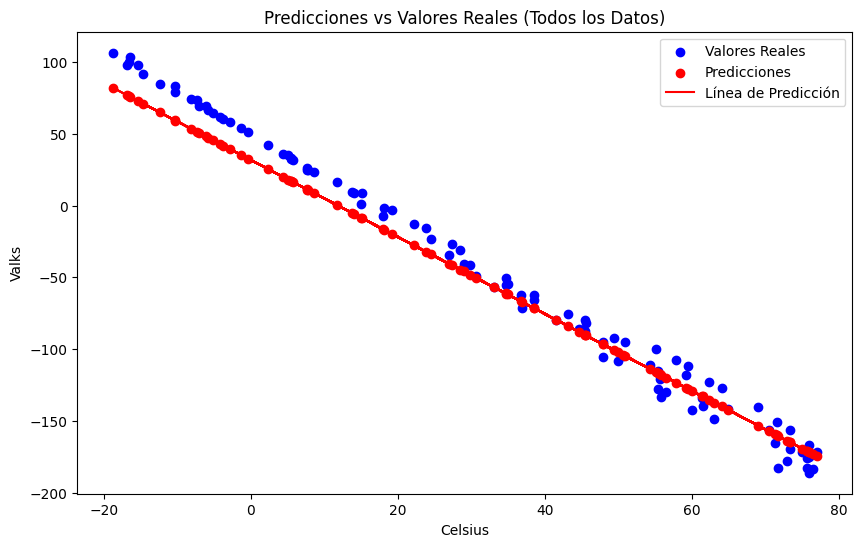

In [ ]:
# Importar módulos
import pandas as pd
# --- linear_model (regresión y clasificación)
from sklearn import linear_model
# --- model_selection (train_test_split)
from sklearn.model_selection import train_test_split
# --- metrics (para puntajes)
from sklearn import metrics
import matplotlib.pyplot as plt


# Cargar datos
df = pd.read_csv('/content/Valhalla23.csv')
# Separar datos en subconjuntos (usando train_test_split)
X = df[['Celsius']]  # Variables predictoras
y = df['Valks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo
# --- Crear objeto del modelo
model = linear_model.SGDRegressor(eta0=0.002, max_iter=20000, random_state=42)
# Ajustar el modelo los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento
train_score = model.score(X_train, y_train)
print(f'Score en entrenamiento: {train_score}')

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
test_error = metrics.mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio en prueba: {test_error}')

# Graficar los resultados
y_pred_all = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Valores Reales')
plt.scatter(X, y_pred_all, color='red', label='Predicciones')
plt.plot(X, y_pred_all, color='red', label='Línea de Predicción')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Predicciones vs Valores Reales (Todos los Datos)')
plt.legend()
plt.show()